# ML Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_driving_hours = [10, 9, 2, 15, 10, 16, 11, 16]
y_risk_score = [95, 80, 10, 50, 45, 98, 38, 93]

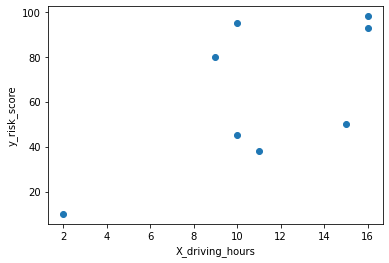

In [7]:
plt.plot(X_driving_hours, y_risk_score, "o")
plt.xlabel("X_driving_hours")
plt.ylabel("y_risk_score")
plt.show()

In [13]:
def find_mean(values):
    return sum(values)/float(len(values))

def find_variance(values, mean):
    return sum([(x-mean)**2 for x in values])

def find_covariance(x, x_mean, y, y_mean):
    covar = 0.0
    
    for i in range(len(x)):
        covar += (x[i] - x_mean) * (y[i] - y_mean)
        
    return covar

In [14]:
def find_coeficients(x, y):
    mean_x = find_mean(x)
    mean_y = find_mean(y)
    
    b1 = find_covariance(x, mean_x, y, mean_y)/find_variance(x, mean_x)
    
    b0 = mean_y - b1 * mean_x
    
    return [b0, b1]

In [16]:
b0, b1 = find_coeficients(X_driving_hours, y_risk_score)

print("b0 = ", b0)
print("b1 = ", b1)

print("y = b0 + b1*x => y = %.3f + %.3f * x" % (b0, b1))

b0 =  12.584627964022893
b1 =  4.58789860997547
y = b0 + b1*x => y = 12.585 + 4.588 * x


In [20]:
def abline(intercept, slope):
    axes = plt.gca()
    xval = np.array(axes.get_xlim())
    yval = intercept + slope * xval
    
    plt.plot(xval, yval, "--")
    

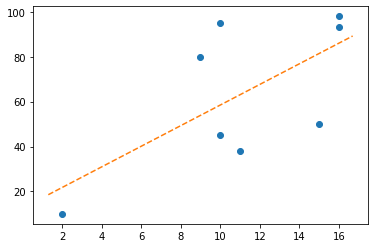

In [21]:
plt.plot(X_driving_hours, y_risk_score, "o")
abline(b0, b1)

In [22]:
# predict

def linear_regression(X_train, y_train, X_test):
    
    b0, b1 = find_coeficients(X_train, y_train)
    
    pred = []
    
    for row in X_test:
        p = b0 + b1 * row
        pred.append(p)
        
    return pred

In [24]:
n = int(input("Enter the number of predictions : "))

res = []

for i in range(n):
    e = int(input())
    res.append(e)
    
prediction = linear_regression(X_driving_hours, y_risk_score, res)

prediction

Enter the number of predictions : 3
3
7
14


[26.348323793949305, 44.699918233851186, 76.81520850367949]

In [25]:
import math

def find_rmse(actual, pred):
    
    sum_err = 0
    
    for i in range(len(actual)):
        pred_err = pred[i] - actual[i]
        
        sum_err += pred_err**2
        
    mean_err = sum_err/float(len(actual))
    
    return math.sqrt(mean_err)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_driving_hours, y_risk_score, test_size = 1/3, random_state = 0)

y_pred = linear_regression(X_train, y_train, X_test)

print("RMSE : ", find_rmse(y_test, y_pred))

RMSE :  29.547856861944695


In [28]:
from sklearn.linear_model import LinearRegression

X = np.array(X_driving_hours).reshape(-1, 1)
y = np.array(y_risk_score).reshape(-1, 1)

lr = LinearRegression().fit(X, y)

In [29]:
lr.intercept_

array([12.58462796])

In [30]:
lr.coef_

array([[4.58789861]])

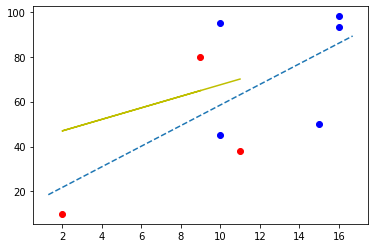

In [31]:
plt.plot(X_train, y_train, "bo")
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred, "y")
abline(b0, b1)
plt.show()

# ML Assignment 2

In [33]:
import numpy as np
import pandas as pd
from numpy import log2 as log

In [65]:
dataset = [
    ['<21', 'High', 'Male', 'Single' ,'No'],
    ['<21', 'High', 'Male', 'Married' ,'No'],
    ['21-35', 'High', 'Male', 'Single' ,'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single' ,'Yes'],
    ['>35', 'Low', 'Female', 'Married' ,'No'],
    ['21-35', 'Low', 'Female', 'Married' ,'Yes'],
    ['<21', 'Medium', 'Male', 'Single' ,'No'],
    ['<21', 'Low', 'Female', 'Married' ,'Yes'],
    ['>35', 'Medium', 'Female', 'Single' ,'Yes'],
    ['<21', 'Medium', 'Female', 'Married' ,'Yes'],
    ['21-35', 'Medium', 'Male', 'Married' ,'Yes'],
    ['21-35', 'High', 'Female', 'Single' ,'Yes'],
    ['>35', 'Medium', 'Male', 'Married' ,'No'],
]

In [66]:
columns = ["Age", "Income", "Gender", "Marital Status", "Buys"]

df = pd.DataFrame(dataset, columns=columns)

df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(0, 5):
    df[columns[i]] = le.fit_transform(df[columns[i]])

In [68]:
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [77]:
eps = np.finfo(float).eps

print(eps)

2.220446049250313e-16


In [70]:
def find_entropy(df):
    Class = df.keys()[-1]
    
    values = df[Class].unique()
    
    entropy = 0
    
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
        
        print("Class : ", Class, ", E(S) : ", entropy)
        
    return entropy

In [71]:
def find_entropy_attribute(df, attribute):
    Class = df.keys()[-1]
    
    variables = df[attribute].unique()
    
    target_variables = df[Class].unique()
    
    entropy2 = 0
    
    for variable in variables:
        entropy1 = 0
        
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class]==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            
            fraction1 = num/(den+eps)
            entropy1 += -fraction1*log(fraction1+eps)

        
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy1
        
        print("Class : ", Class, ", E(T, X) : ", entropy2)

    return abs(entropy2)

In [72]:
def find_winner(df):
    
    IG = []
    
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df) - find_entropy_attribute(df, key))
        print("Index of Attribute with max gain : ", np.argmax(IG))
        
    return df.keys()[:-1][np.argmax(IG)]

In [73]:
def find_subtable(df, node, value):
    return df[df[node]==value].reset_index(drop=True)

In [78]:
def build_tree(df, tree=None):
    
    node = find_winner(df)
    
    print("Node with max gain : ", node)
    
    attrVal = np.unique(df[node])
    
    print("Distinct values of ", node, " : ", attrVal)
    
    if tree is None:
        tree = {}
        tree[node] ={}
        
    for value in attrVal:
        subtable = find_subtable(df, node, value)
        
        print("Subtable : \n", subtable)
        
        uval, counts = np.unique(subtable['Buys'], return_counts=True)
        
        print(uval, counts)
        
        if len(counts)==1:
            tree[node][value] = uval[0]
        else:
            tree[node][value] = build_tree(subtable)
            
    return tree

In [90]:
def predict(instr, tree):
    
    for node in tree.keys():
        
        value = instr[node]
        
        preds = 0
        
        tree = tree[node][value]
        
        if type(tree) is dict:
            preds = predict(instr, tree)
        else:
            preds = tree
            break
            
    return preds

In [91]:
dtree = build_tree(df)

dtree

Class :  Buys , E(S) :  0.5305095811322292
Class :  Buys , E(S) :  0.9402859586706311
Class :  Buys , E(T, X) :  -0.34676806944809574
Class :  Buys , E(T, X) :  -0.34676806944809563
Class :  Buys , E(T, X) :  -0.6935361388961914
Index of Attribute with max gain :  0
Class :  Buys , E(S) :  0.5305095811322292
Class :  Buys , E(S) :  0.9402859586706311
Class :  Buys , E(T, X) :  -0.28571428571428553
Class :  Buys , E(T, X) :  -0.6792696431662093
Class :  Buys , E(T, X) :  -0.9110633930116756
Index of Attribute with max gain :  0
Class :  Buys , E(S) :  0.5305095811322292
Class :  Buys , E(S) :  0.9402859586706311
Class :  Buys , E(T, X) :  -0.49261406801712543
Class :  Buys , E(T, X) :  -0.7884504573082889
Index of Attribute with max gain :  0
Class :  Buys , E(S) :  0.5305095811322292
Class :  Buys , E(S) :  0.9402859586706311
Class :  Buys , E(T, X) :  -0.43156028428331517
Class :  Buys , E(T, X) :  -0.9241743523004406
Index of Attribute with max gain :  0
Node with max gain :  Age
Dis

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}

In [92]:
test = pd.DataFrame([[1, 1, 0 , 0]], columns=['Age', 'Income', 'Gender', 'Marital Status'])

test

,Age,Income,Gender,Marital Status
0,1,1,0,0


In [94]:
p = predict(test.iloc[0], dtree)

p

1

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


skdt = DecisionTreeClassifier(criterion="entropy")
df1 = df.copy()
df1.drop('Buys', inplace =True, axis=1)
X = df1
skdt.fit(X, df['Buys'])

p1 =skdt.predict(test)

p1

array([1])

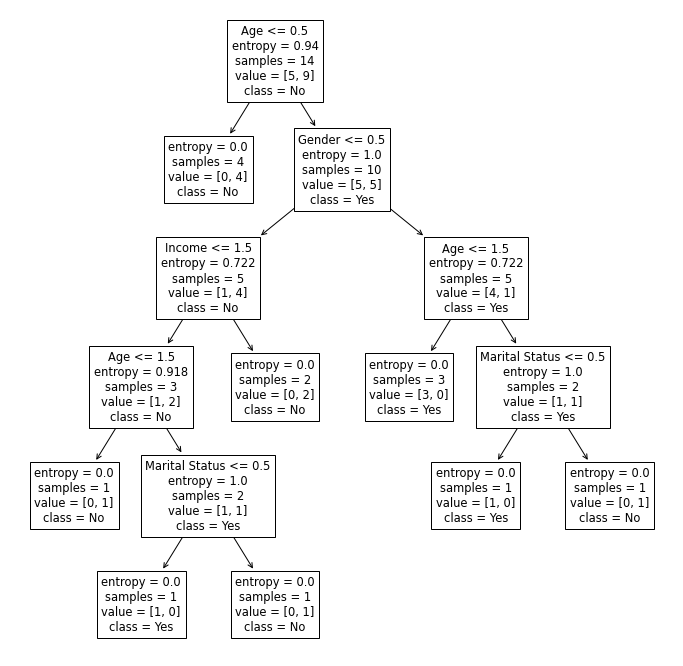

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
dec_tree = plot_tree(decision_tree=skdt, feature_names=df.columns, class_names=["Yes", "No"])
plt.show()

In [98]:
dtree

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}

# ML Assignment 3

In [113]:
import numpy as np
import pandas as pd
import math

In [127]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.X = []
        self.y = []
        
    def fit(self, X, y):
        self.X = self.X + X
        self.y = self.y + y
        
    def distance(self, x, y):
        return math.sqrt(((x[0]-y[0])**2) + ((x[1]-y[1])**2))
    
    def get_class(self, x):
        
        distances = []
        
        for i in range(len(self.X)):
            distances.append((self.distance(x, self.X[i]), self.y[i]))
            
        distances.sort()
        
        distances = distances[:self.k]
        
        count = {}
        
        for d in distances:
            try: count[d[1]] += 1
            except: count[d[1]] = 1
                
        return max(count, key=lambda i : count[i])
    
    def predict(self, X):
        
        pred = []
        
        for x in X:
            pred.append(self.get_class(x))
            
        return pred
    
    
    def get_class_weighted(self, x):
        
        distances = []
        
        for i in range(len(self.X)):
            distances.append((self.distance(x, self.X[i]), self.y[i]))
            
        distances.sort()
        
        distances = distances[:self.k]
        
        count = {}
        
        for d in distances:
            try: count[d[1]] += 1/d[0]
            except: count[d[1]] = 0
                
        return max(count, key=lambda i : count[i])
    
    def predict_weighted(self, X):
        
        pred = []
        
        for x in X:
            pred.append(self.get_class_weighted(x))
            
        return pred
    
    
    def get_class_locally_average(self, x):
        
        distances = []
        
        for i in range(len(self.X)):
            distances.append((self.distance(x, self.X[i]), self.y[i]))
            
        distances.sort()
        
        distances = distances[:self.k]
        
        count = {}
        
        for d in distances:
            try: count[d[1]].append(1/d[0])
            except: count[d[1]] = 0
                
        for c in count:
            count[d[1]] = np.mean(count[d[1]])
                
        return max(count, key=lambda i : count[i])
    
    def predict_locally_average(self, X):
        
        pred = []
        
        for x in X:
            pred.append(self.get_class_locally_average(x))
            
        return pred

In [128]:
X = [(2, 4), (4, 2), (4, 4), (4, 6), (6, 2), (6, 4)]
y = ['Y', 'Y', 'B', 'Y', 'B', 'Y']

In [129]:
knn = KNN(3)

knn.fit(X, y)

In [136]:
print("Std KNN (6, 6) : ", knn.predict([(6, 6)]))
print("Weighted KNN (6, 6) : ", knn.predict_weighted([(6, 6)]))
print("Locally average KNN (6, 6) : ", knn.predict_locally_average([(6, 6)]))

Std KNN (6, 6) :  ['Y']
Weighted KNN (6, 6) :  ['Y']
Locally average KNN (6, 6) :  ['Y']


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)

knn1.fit(X, y)

p1 = knn1.predict([(6, 6)])

print(p1)

['Y']


In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn2.fit(X, y)

p2 = knn2.predict([(6, 6)])

print(p2)

['Y']


# ML Assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
P1 = [0.1, 0.6]
P2 = [0.15, 0.71]
P3 = [0.08, 0.9]
P4 = [0.16, 0.85]
P5 = [0.2, 0.3]
P6 = [0.25, 0.5]
P7 = [0.24, 0.1]
P8 = [0.3, 0.2]

points = [P1, P2, P3, P4, P5, P6, P7, P8]

In [3]:
import math
def dist(A, B):
    S = 0
    
    for i in range(len(A)):
        S += ((A[i] - B[i]) ** 2)
        
    return math.sqrt(S)


In [4]:
def cluster(C1, C2):
    c1 = C1
    c2 = C2
    
    cluster1 = list()
    cluster2 = list()
    
    for p in points:
        d1 = dist(p, C1)
        d2 = dist(p, C2)
        
        if d1<d2:
            cluster1.append(p)
        else:
            cluster2.append(p)
            
    
    x1 = 0
    y1 = 0
    
    for i in cluster1:
        x1 = x1 + i[0]
        y1 = y1 + i[1]
        
    x1 = x1/len(cluster1)
    y1 = y1/len(cluster1)
    
    centroid1 = [x1, y1]
    
    
    x2 = 0
    y2 = 0
    
    for i in cluster2:
        x2 = x2 + i[0]
        y2 = y2 + i[1]
        
    x2 = x2/len(cluster2)
    y2 = y2/len(cluster2)
    
    centroid2 = [x2, y2]
    
    
    C1 = centroid1
    C2 = centroid2
    
    if centroid1[0]==c1[0] and centroid1[1]==c1[1] and centroid2[0]==c2[0] and centroid2[1]==c2[1]:
        
        print("Clusters are : ")
        print("C1 : ", cluster1)
        print("C2 : ", cluster2)
        
        if P6 in cluster1:
            print("Point P6 belongs to Cluster 1")
        else:
            print("Point P6 belongs to Cluster 2")
            
        print("Population of Cluster around m2 : ", len(cluster2))
        
        print("Updated Values : ")
        print("M1/C1 : ", C1)
        print("M2/C2 : ", C2)
        
        P = list()
        
        for p in points:
            if p in cluster1:
                P.append(0)
            else:
                P.append(1)
                
        C = [C1, C2]
        C_arr = np.array(C)
        
        X = np.array(points)
        
        colors = list(map(lambda x: 'blue' if x==1 else 'red', P))
        plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
        plt.scatter(C_arr[:,0], C_arr[:,1], c='g', marker="x")
        plt.show()
        
    else:
        cluster(C1, C2)

Initial Data Points and their clusters : 
 [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]


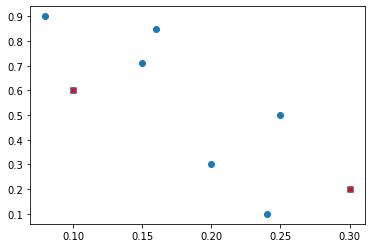

Clusters are : 
C1 :  [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]
C2 :  [[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]
Point P6 belongs to Cluster 1
Population of Cluster around m2 :  3
Updated Values : 
M1/C1 :  [0.148, 0.712]
M2/C2 :  [0.24666666666666667, 0.20000000000000004]


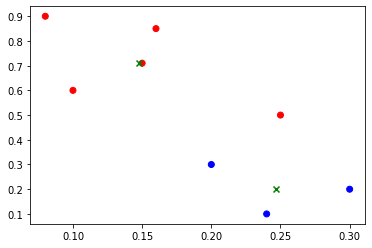

In [5]:
C1 = P1
C2 = P8

print("Initial Data Points and their clusters : \n", points)

X = np.array(points)
C = [C1, C2]
C_arr = np.array(C)
    
plt.scatter(X[:,0], X[:,1], marker="o")
plt.scatter(C_arr[:,0], C_arr[:,1], c='r', marker="x")
plt.show()

cluster(C1, C2)

[[0.2475 0.275 ]
 [0.1225 0.765 ]]
[1 1 1 1 0 0 0 0]


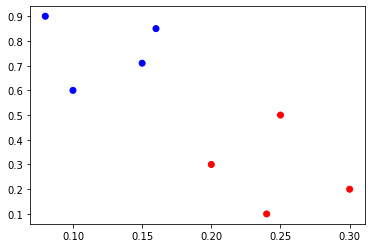

In [8]:
from sklearn.cluster import KMeans

X = np.array(points)
ic = [P1, P8]

km = KMeans(init=np.array(ic), n_clusters=2)
# km = KMeans(init="k-means++", n_clusters=2)

km.fit(X)

pred = km.predict(X)

print(km.cluster_centers_)
print(km.labels_)

colors = list(map(lambda x: 'blue' if x==1 else 'red', pred))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
# plt.scatter(C_arr[:,0], C_arr[:,1], c='g', marker="x")
plt.show()

# ICS Assignment 1

In [73]:
#permutations for keys
p10_seq = (3, 5, 2, 7, 4, 10, 1, 9, 8, 6)
p8_seq = (6, 3, 7, 4, 8, 5, 10, 9)

#permutations for text
ip_seq = (2, 6, 3, 1, 4, 8, 5, 7)
inv_ip_seq = (4, 1, 3, 5, 7, 2, 8, 6)

#permutation to expand 4 bit to 8 bit
ep_seq = (4, 1, 2, 3, 2, 3, 4, 1)

#permutation for 4 bits
p4_seq = (2, 4, 3, 1)

#s boxes
s0_seq = [
            ["01", "00", "11", "10"],
            ["11", "10", "01", "00"],
            ["00", "10", "01", "11"],
            ["11", "01", "11", "10"]
         ]

s1_seq = [
            ["00", "01", "10", "11"],
            ["10", "00", "01", "11"],
            ["11", "00", "01", "00"],
            ["10", "01", "00", "11"]
         ]

In [74]:
def left_shif(s, bits):
    s = s[bits:] + s[:bits]
    
    return s

In [75]:
def permute_and_generate(ip, seq):
    
    s = ""
    
    for val in seq:
        s += ip[val-1]
        
    return s

In [76]:
def generate_keys(key):
    
    p10 = permute_and_generate(key, p10_seq)
    
    left_p10 = p10[0:5]
    right_p10 = p10[5:10]
    
    ls_left1 = left_shif(left_p10, 1)
    ls_right1 = left_shif(right_p10, 1)
    
    k1 = permute_and_generate(ls_left1 + ls_right1, p8_seq)
    
    print("k1 : ", k1)
    
    ls_left2 = left_shif(ls_left1, 2)
    ls_right2 = left_shif(ls_right1, 2)
    
    k2 = permute_and_generate(ls_left2 + ls_right2, p8_seq)
    
    print("k2 : ", k2)
    
    
    return k1, k2

In [77]:
def find_xor(s1, s2):
    xor = ""
    
    for i in range(len(s1)):
        if s1[i]==s2[i]:
            xor+="0"
        else:
            xor+="1"
            
    return xor

In [78]:
def find_s0_s1(xor_half, lookup_table):
    r = (int(xor_half[0]) * 2) + int(xor_half[3])
    c = (int(xor_half[1]) * 2) + int(xor_half[2])
    
    return lookup_table[r][c]

In [79]:
def round_encrypt(ip, key):
    
    ep_per = permute_and_generate(ip, ep_seq)
    print("EP(IP) : ", ep_per)

    ep_per_xor = find_xor(ep_per, key)
    
    print("EP(IP) XOR key : ", ep_per_xor)

    ep_left = ep_per_xor[:4]
    ep_right = ep_per_xor[4:]
    
    s0 = find_s0_s1(ep_left, s0_seq)
    s1 = find_s0_s1(ep_right, s1_seq)
    
    print("s0 : ", s0)
    print("s1 : ", s1)
    
    p4 = permute_and_generate(s0 + s1, p4_seq)
    
    return p4

In [80]:
def encrypt_decrypt(ip, k1, k2):
    
    ip_per = permute_and_generate(ip, ip_seq)
    
    print("IP(IP) : ", ip_per)

    
    ip_left = ip_per[:4]
    ip_right = ip_per[4:]
    
#     round 1
    r1_output = round_encrypt(ip_right, k1)
    print("round1(R, k1) : ", r1_output)

    r1_output = find_xor(r1_output, ip_left)
    print("L XOR round1(r1_output, k1) : ", r1_output)

    
#     round 2
    r2_output = round_encrypt(r1_output, k2)
    print("round2(r1_output, k2) : ", r2_output)

    r2_output = find_xor(r2_output, ip_right)
    print("R XOR round2(r2_output, k2) : ", r2_output)

    
    ip_inv = permute_and_generate(r2_output + r1_output, inv_ip_seq)
    
    return ip_inv

In [81]:
k1, k2 = generate_keys("1100011110")

k1 :  11101001
k2 :  10100111


In [82]:
plaintext = "00101000"

ct = encrypt_decrypt(plaintext, k1, k2)

print("pt : ", plaintext)
print("ct : ", ct)

dt = encrypt_decrypt(ct, k2, k1)

print("dt : ", dt)

IP(IP) :  00100010
EP(IP) :  00010100
EP(IP) XOR key :  11111101
s0 :  10
s1 :  00
round1(R, k1) :  0001
L XOR round1(r1_output, k1) :  0011
EP(IP) :  10010110
EP(IP) XOR key :  00110001
s0 :  10
s1 :  10
round2(r1_output, k2) :  0011
R XOR round2(r2_output, k2) :  0001
pt :  00101000
ct :  10001010
IP(IP) :  00010011
EP(IP) :  10010110
EP(IP) XOR key :  00110001
s0 :  10
s1 :  10
round1(R, k1) :  0011
L XOR round1(r1_output, k1) :  0010
EP(IP) :  00010100
EP(IP) XOR key :  11111101
s0 :  10
s1 :  00
round2(r1_output, k2) :  0001
R XOR round2(r2_output, k2) :  0010
dt :  00101000


# ICS Assignment 2 (ECC)

In [105]:
P = 101

In [106]:
def mod_mul(a, b, m = P):
    return ((a%m) * (b%m)) % m

def mod_pow(a, b, m = P):
    if b==0:
        return 1
    
    r = mod_pow(a, b//2, m)
    
    r = (r*r)%m
    
    if b%2:
        r = (r*a)%m
        
    return r

def mod_div(a, b, m = P):
    return mod_mul(a, mod_pow(b, m-2, m), m)

In [107]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __eq__(self, p2):
        return self.x==p2.x and self.y==p2.y
    
    def __str__(self) -> str:
        return f"({self.x}, {self.y})"
    

In [108]:
class EllipticCurve:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def add(self, p1, p2, m = P):
        l = 0
        
        if p1 == p2:
            num = 3 * p1.x * p1.x + self.a
            den = 2 * p1.y
        else:
            num = p2.y - p1.y
            den = p2.x - p1.x
            
        l = mod_div(num, den, m)
        
        x3 = ((l*l) - p1.x - p2.x) % m
        y3 = (l*(p1.x - x3) - p1.y) % m
        
        return Point(x3, y3)
    
    def mul(self, k, p):
        temp = p
        
        while k!=1:
            temp = self.add(temp, p)
            k -= 1
            
        return temp
    
    def sub(self, p1, p2):
        np = Point(p2.x , -p2.y)
        return self.add(p1, np)

In [109]:
curve = EllipticCurve(2, 4)
G = Point(0, 2)

In [110]:
def encrypt(p, U):
    k = 5
    
    c = [
        curve.mul(k, G),
        curve.add(p, curve.mul(k, U))
    ]
    
    return c

In [111]:
def decrypt(C, R):
    p = curve.sub(C[1], curve.mul(R, C[0]))
    
    return p

In [112]:
R = 5
U = curve.mul(R, G)

print("Private Key: ", R)
print("Public Key : ", U)

Private Key:  5
Public Key :  (52, 15)


In [113]:
pt = Point(3, 4)

print("PT: ", pt)

ct = encrypt(pt, U)

print("CT : ", ct[0], ct[1])

PT:  (3, 4)
CT :  (52, 15) (9, 34)


In [114]:
dt = decrypt(ct, R)
print("DT : ", dt)

DT :  (3, 4)


In [115]:
assert(pt == dt)

In [116]:
if(pt==dt):
    print("PT and DT are same")

PT and DT are same


# ICS Assignment 3

In [78]:
from math import gcd


def isPrime(n):
    if n==0 or n==1:
        return False
    
    r = int(n/2)
    
    for i in range(2, r):
        if(n%i == 0):
            return False
        
    return True


def get_primitive_root(n):
    flag = False
    
    for r in range(1, n):
        
        values = {}
        
        for x in range(0, n-1):
            val = pow(r, x, n)
            
            if val in values.keys():
                break
                
            values[val] = True
            
            if x==n-2:
                flag = True

        if flag==True:
            return r
        
    return None


def DHKE():
    
    n = int(input("Enter n : "))
    
    if(isPrime(n)):
        g = get_primitive_root(n)

#         g = int(input("Enter g : "))
        
        print("g is : ", g)
        
        a = int(input("Enter A's secret number (a) : "))
        b = int(input("Enter B's secret number (b) : "))
        
        
        A = pow(g, a)%n
        B = pow(g, b)%n
        
        print("A's public key : ", A)
        print("B's public key : ", B)
        
        print("Calculating the shared key")
        
        k1 = pow(B, a)%n
        
        k2 = pow(A, b)%n
        
        print("Shared Key of A : ", k1)
        
        print("Shared Key of B : ", k2)
                
        
    else:
        print("Please enter prime number")

In [79]:
DHKE()

Enter n : 23
g is :  5
Enter A's secret number (a) : 2
Enter B's secret number (b) : 3
A's public key :  2
B's public key :  10
Calculating the shared key
Shared Key of A :  8
Shared Key of B :  8


# ICS Assignment 4

In [7]:
def isPrime(n):
    if n==0 or n==1:
        return False
    
    r = int(n/2)
    
    for i in range(2, r):
        if(n%i)==0:
            return False
        
    return True

def generate_primes():
    primes = [i for i in range(1, 999) if isPrime(i)]
    
    return random.choices(primes, key=2)

In [24]:
class RSA:
    def __init__(self, p, q):
        self.p = p
        self.q = q
        self.N = p * q
        self.product = (p-1) * (q-1)
        self.generateKeys()
        
    def generateKeys(self):
        
        for i in range (1, 999999):
            if(self.product % i != 0):
                self.E = i
                break
                
        for i in range(1, self.product-1):
            if((i*self.E) % self.product == 1):
                self.D = i
                break
                
        print("Encryption Key (N, E) : (", self.N, ", ", self.E, ")")
        print("Decryption Key (N, D) : (", self.N, ", ", self.D, ")")
        
    def encrypt(self, plain):
        pt = []
        ct = []

        for i in plain:
            pt.append(ord(i))

        for i in pt:
            ct.append((i**self.E)%self.N)

        return ct

    def decrypt(self, cipher):

        dt = []

        for i in cipher:
            dt.append(chr((i**self.D)%self.N))

        return ''.join(dt)


    def encrypt2(self, plain):
        ct = (int(plain)**self.E)%self.N

        return ct

    def decrypt2(self, cipher):

        dt = (int(cipher)**self.D)%self.N

        return dt


In [25]:
if __name__ == "__main__":
    
    p = int(input("Enter P : "))
    q = int(input("Enter Q : "))
    
#     p, q = generate_primes()

    if(isPrime(p) and isPrime(q)):
        rsa = RSA(p, q)
        
        pt = input("Enter PT : ")
        
        ct = rsa.encrypt(pt)
        
        print("CT : ", ct)
        
        dt = rsa.decrypt(ct)
        
        print("DT : ", dt)
        
        print("----------------")
        
        ct = rsa.encrypt2(pt)
        
        print("CT : ", ct)
        
        dt = rsa.decrypt2(ct)
        
        print("DT : ", dt)
    else:
        print("Both numbers should be prime")

Enter P : 17
Enter Q : 29
Encryption Key (N, E) : ( 493 ,  3 )
Decryption Key (N, D) : ( 493 ,  299 )
Enter PT : 10
CT :  [315, 160]
DT :  10
----------------
CT :  14
DT :  10
